# Data Science Salary Report

## Introduction

Throughout the past few years, data science jobs have become more in demand than ever, with the U.S. Bureau of Labor Statistics predicting data science to see more growth than almost any other field between now and 2029 (Davenport, 2022).

Data science is a varied field, with a wide range of work that involves performing robust analytics (Anderson, 2018). Therefore, the dataset "Data Science Job Salaries" found on Kaggle provides valuable insights into professions in data science, as it is a collection of salary records for data science professionals across various countries from the years 2020 to 2022. This data provides a snapshot of the data science job market, offering insights into salary trends, the impact of geographical location, and the influence of remote work on compensation. There are 607 observations and 12 columns in the dataset with 11 variables total (one column contains row numbers):


**Categorical variables:**

- work_year: the year in which the salary was paid
- experience_level: the experience level in job, which can be entry-level/junior (EN), mid-level/intermediate (MI), senior-level/expert (SE), executive-level/senior (EX)
- employment_type: the type of employment for the role, which can be part-time (PT), full-time (FT), contract (CT) or freelance (FL)
- job_title: role of the employee
- employee_residence: the employee's primary country of residence, expressed using ISO 3166 country codes
- remote_ratio: the overall ratio of work done remotely, which can be no remote work or less than 20% (0), partially remote (50) or fully remote or more than 80% (100)
- company_location: the country where the employer's main office/contracting branch is located, expressed using ISO 3166 country codes.
- company_size: the average number of people working for the company, which can be less than 50 employees (S), 50 to 250 employees (M) or more than 250 employees (L)
- salary_currency: the currency of the salary, expressed using ISO 4217 currency codes

**Continuous variables:**

- salary: the total gross salary paid to employee
- salary_in_usd: salary converted to USD using the average exchange rate of the work year

Using this data, we would like to answer the question: 

**What characteristics of a data science job and/or data science employee are associated with a data scientist's salary in USD?** 

Determining what characteristics about a job and employees are associated can be useful, as it can inform data scientists who are looking for jobs on what usually is associated with jobs with higher salaries. It can also be used in future analyses to compare data science jobs with other jobs in technology sector.

## Exploratory Data Analysis

In [1]:
#Download necessary libraries and format graphs.
install.packages("countrycode")
install.packages("StepReg")

#Loading the packages we need
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(StepReg)
library(mltools)
library(GGally)
library(scales)
library(countrycode)
library(car)
library(lmtest)

options(repr.plot.width = 14, repr.plot.height = 10)


The downloaded binary packages are in
	/var/folders/5j/m6szk0mj5b95k_kbw53pml000000gn/T//Rtmpr6mqWD/downloaded_packages

The downloaded binary packages are in
	/var/folders/5j/m6szk0mj5b95k_kbw53pml000000gn/T//Rtmpr6mqWD/downloaded_packages


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
-- Attaching packages -------------------------------------- tidymodels 1.2.0 --

v broom        1.0.6      v rsample      1.2.1 
v dials        1.2.1      v tune         1.2.1 
v infer        1.0.7      v workflows    1.1.4 
v modeldata    1.4.0      v workflowsets 1.1.0 
v parsnip      1.2.1      v yardstick    1.3.1 
v recipes      1.0.10     

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x scales::discard() masks purrr::discard()
x 

In [2]:
# Main developer: Stevan
#Set seed for reproducibility
set.seed(6)

### Loading and Checking the Data

In [3]:
# Main developer: Eric
#Read data into R. Dataset was uploaded to a GitHub repo to allow it to be read from a URL.
ds_salaries <- read_csv("https://raw.githubusercontent.com/1zhoueri/stat-301-project/main/ds_salaries.csv")

New names:
* `` -> `...1`
Rows: 607 Columns: 12
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Main developer: Eric
#Check the packaging.
str(ds_salaries)

spc_tbl_ [607 x 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1              : num [1:607] 0 1 2 3 4 5 6 7 8 9 ...
 $ work_year         : num [1:607] 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ experience_level  : chr [1:607] "MI" "SE" "SE" "MI" ...
 $ employment_type   : chr [1:607] "FT" "FT" "FT" "FT" ...
 $ job_title         : chr [1:607] "Data Scientist" "Machine Learning Scientist" "Big Data Engineer" "Product Data Analyst" ...
 $ salary            : num [1:607] 70000 260000 85000 20000 150000 72000 190000 11000000 135000 125000 ...
 $ salary_currency   : chr [1:607] "EUR" "USD" "GBP" "USD" ...
 $ salary_in_usd     : num [1:607] 79833 260000 109024 20000 150000 ...
 $ employee_residence: chr [1:607] "DE" "JP" "GB" "HN" ...
 $ remote_ratio      : num [1:607] 0 0 50 0 50 100 100 50 100 50 ...
 $ company_location  : chr [1:607] "DE" "JP" "GB" "HN" ...
 $ company_size      : chr [1:607] "L" "S" "M" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  .

#### Table 1 and 2: Data Scientist Job Salaries Dataset

In [5]:
# Main developer: Eric
#Show the top and bottom of the data.
head(ds_salaries)
tail(ds_salaries)

...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [6]:
# Main developer: Eric
#Check the dimensions of the data.
dim(ds_salaries)

[1] 607  12

In [7]:
# Main developer: Eric
#View summary statistics and the number of unique values in the dataset.
summary(ds_salaries, maxsum = 30)
sapply(ds_salaries, function(x) n_distinct(x))


      ...1         work_year    experience_level   employment_type   
 Min.   :  0.0   Min.   :2020   Length:607         Length:607        
 1st Qu.:151.5   1st Qu.:2021   Class :character   Class :character  
 Median :303.0   Median :2022   Mode  :character   Mode  :character  
 Mean   :303.0   Mean   :2021                                        
 3rd Qu.:454.5   3rd Qu.:2022                                        
 Max.   :606.0   Max.   :2022                                        
  job_title             salary         salary_currency    salary_in_usd   
 Length:607         Min.   :    4000   Length:607         Min.   :  2859  
 Class :character   1st Qu.:   70000   Class :character   1st Qu.: 62726  
 Mode  :character   Median :  115000   Mode  :character   Median :101570  
                    Mean   :  324000                      Mean   :112298  
                    3rd Qu.:  165000                      3rd Qu.:150000  
                    Max.   :30400000                      Ma

...1          work_year   experience_level    employment_type 
               607                  3                  4                  4 
         job_title             salary    salary_currency      salary_in_usd 
                50                272                 17                369 
employee_residence       remote_ratio   company_location       company_size 
                57                  3                 50                  3

Some changes need to be made to the data at first glance. The first column is unnecessary as it only contains row numbers (not a variable) which should eventually be removed and the character columns should be factors in order to use them as categorical variables. Since we have decided to perform inference on `salary_in_usd`, we will drop `salary` and `salary_currency` as they will be unused and are too highly correlated with the response variable.

In [8]:
# Main Developer: Anna
# Function to count factors in each categorical variable
count_levels <- function(df) {
  cat("Number of levels in each categorical variable:\n")
  for (col_name in names(df)) {
    if (is.factor(df[[col_name]]) || is.character(df[[col_name]])) {
      num_levels <- nlevels(factor(df[[col_name]]))
      cat(col_name, ": ", num_levels, "\n", sep = "")
    }
  }
}

# Count and display the number of factors in each categorical variable
count_levels(ds_salaries)

Number of levels in each categorical variable:
experience_level: 4
employment_type: 4
job_title: 50
salary_currency: 17
employee_residence: 57
company_location: 50
company_size: 3


Here we can see the number of factors present in each categorical variable. We can see there are 50 factors in job_titles and company_location which we need to deal with later in order to prevent overfitting issues. 

### Cleaning and Tidying Data

In [9]:
# Main developer: Eric
#Turn catagorical variables into factors.
tidy_ds_salaries <- ds_salaries |>
    mutate(across(-c(salary, salary_in_usd), as.factor))

In [10]:
# Main developer: Stevan
tidy_ds_salaries <- tidy_ds_salaries |>
    select(-salary, -salary_currency)

In [11]:
# Main developer: Eric
#View summary statistics about the dataset.
summary(tidy_ds_salaries, maxsum = 60)

      ...1     work_year  experience_level employment_type
 0      :  1   2020: 72   EN: 88           CT:  5         
 1      :  1   2021:217   EX: 26           FL:  4         
 2      :  1   2022:318   MI:213           FT:588         
 3      :  1              SE:280           PT: 10         
 4      :  1                                              
 5      :  1                                              
 6      :  1                                              
 7      :  1                                              
 8      :  1                                              
 9      :  1                                              
 10     :  1                                              
 11     :  1                                              
 12     :  1                                              
 13     :  1                                              
 14     :  1                                              
 15     :  1                                            

Based on the new summary output, we can now see what groups of observations exist in the data. There are 50 levels for the variable "company_location" and the majority of locations have too little data points to provide for a significant analysis. Since `employee_residence`, `company_location`, and `job_title` have many different groups, we will simplify them by merging the different countries in  `employee_residence` and `company_location` into 7 regions (defined in the World Bank Development Indicators) and by merging the jobs in `job_title` into 3 groups: Data Scientist, Data Analyst, and Data Engineer. 
- Data Scientist will be more general and includes jobs that mention scientist, researcher, consultant, or heads of data science departments (excluding ones that mention engineer).
- Data Analyst will include jobs that mention analytics and analyst (excluding ones that mention engineer).
- Data Engineer will include jobs that mention engineer, engineering, architect, and developer.


In [12]:
# Main developer: Eric
#Merge countries in `employee_residence` and `company_location` into 7 regions.
tidy_ds_salaries$company_location <- as.factor(countrycode(tidy_ds_salaries$company_location, "iso2c", "region"))
tidy_ds_salaries$employee_residence <- as.factor(countrycode(tidy_ds_salaries$employee_residence, "iso2c", "region"))

In [13]:
# Main developer: Eric
# Contributor: Stevan (complete rewrite)
#Rename each job in `job_title`.
data_scientist_job_titles <- c(
    "Data Scientist", "3D Computer Vision Researcher", "Machine Learning Scientist",
    "AI Scientist", "Applied Data Scientist", "Applied Machine Learning Scientist",
    "Data Science Consultant", "Data Science Manager", "Data Specialist",
    "Director of Data Science", "Head of Data", "Head of Data Science",
    "Head of Machine Learning", "Lead Data Scientist", "Machine Learning Manager",
    "Principal Data Scientist", "Research Scientist", "Staff Data Scientist"
)
data_analyst_job_titles <- c(
    "BI Data Analyst", "Business Data Analyst", "Data Analyst",
    "Data Analytics Lead", "Data Analytics Manager", "Finance Data Analyst",
    "Financial Data Analyst", "Lead Data Analyst", "Marketing Data Analyst",
    "Product Data Analyst", "Principal Data Analyst"
)
data_engineer_job_titles <- c(
    "Analytics Engineer", "Data Engineer", "Big Data Architect",
    "Data Engineer", "Big Data Engineer", "Data Engineer",
    "Cloud Data Engineer", "Data Engineer", "Computer Vision Engineer",
    "Data Engineer", "Computer Vision Software Engineer",
    "Data Engineer", "Data Analytics Engineer", "Data Engineer",
    "Data Architect", "Data Engineer", "Data Engineering Manager",
    "Data Science Engineer", "Director of Data Engineering", "ETL Developer",
    "Lead Data Engineer", "Lead Machine Learning Engineer", "Machine Learning Developer",
    "Machine Learning Engineer", "Machine Learning Infrastructure Engineer", "ML Engineer",
    "NLP Engineer", "Principal Data Engineer"
)

tidy_ds_salaries$job_title <- factor(
    tidy_ds_salaries$job_title,
    levels = c(data_scientist_job_titles, data_analyst_job_titles, data_engineer_job_titles),
    labels = c(rep("Data Scientist", length(data_scientist_job_titles)),
               rep("Data Analyst", length(data_analyst_job_titles)), 
               rep("Data Engineer", length(data_engineer_job_titles)))
)

#Resets the factors in `job_title` to only include the three catagories.
tidy_ds_salaries <- mutate(tidy_ds_salaries, job_title = as.character(job_title)) |>
    mutate(job_title = as.factor(job_title))

summary(tidy_ds_salaries, maxsum = 60)

      ...1     work_year  experience_level employment_type          job_title  
 0      :  1   2020: 72   EN: 88           CT:  5          Data Analyst  :127  
 1      :  1   2021:217   EX: 26           FL:  4          Data Engineer :247  
 2      :  1   2022:318   MI:213           FT:588          Data Scientist:233  
 3      :  1              SE:280           PT: 10                              
 4      :  1                                                                   
 5      :  1                                                                   
 6      :  1                                                                   
 7      :  1                                                                   
 8      :  1                                                                   
 9      :  1                                                                   
 10     :  1                                                                   
 11     :  1                            

#### Table 3: Tidy Data Scientist Job Salaries Dataset

In [14]:
# Main developer: Eric
head(tidy_ds_salaries)

...1,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
0,2020,MI,FT,Data Scientist,79833,Europe & Central Asia,0,Europe & Central Asia,L
1,2020,SE,FT,Data Scientist,260000,East Asia & Pacific,0,East Asia & Pacific,S
2,2020,SE,FT,Data Engineer,109024,Europe & Central Asia,50,Europe & Central Asia,M
3,2020,MI,FT,Data Analyst,20000,Latin America & Caribbean,0,Latin America & Caribbean,S
4,2020,SE,FT,Data Engineer,150000,North America,50,North America,L
5,2020,EN,FT,Data Analyst,72000,North America,100,North America,L


#### Splitting Dataset Into Train, Selection and Test Sets

In [15]:
# Main developer: Stevan
ds_salaries_train <- 
    tidy_ds_salaries |> 
    slice_sample(prop = 0.7)

ds_salaries_part <- 
    tidy_ds_salaries |> 
    anti_join(ds_salaries_train, by = "...1")

ds_salaries_sel <- ds_salaries_part %>% slice_sample(prop = 0.5)
ds_salaries_test <- ds_salaries_part %>% anti_join(ds_salaries_sel, by = "...1")

Now that we have split the dataset, we can remove the row number column which is no longer needed.

In [16]:
# Main developer: Stevan
ds_salaries_train <- ds_salaries_train[, -1]
ds_salaries_sel <- ds_salaries_sel[, -1]
ds_salaries_test <- ds_salaries_test[, -1]

### Data Visualization

The visualizations we will use to explore the data will be boxplots. Visualizations for the variables `salary` and `salary_currency` are not included due to their exclusion from the analysis for the reasons that will be discussed in the **Methods and Plan**.

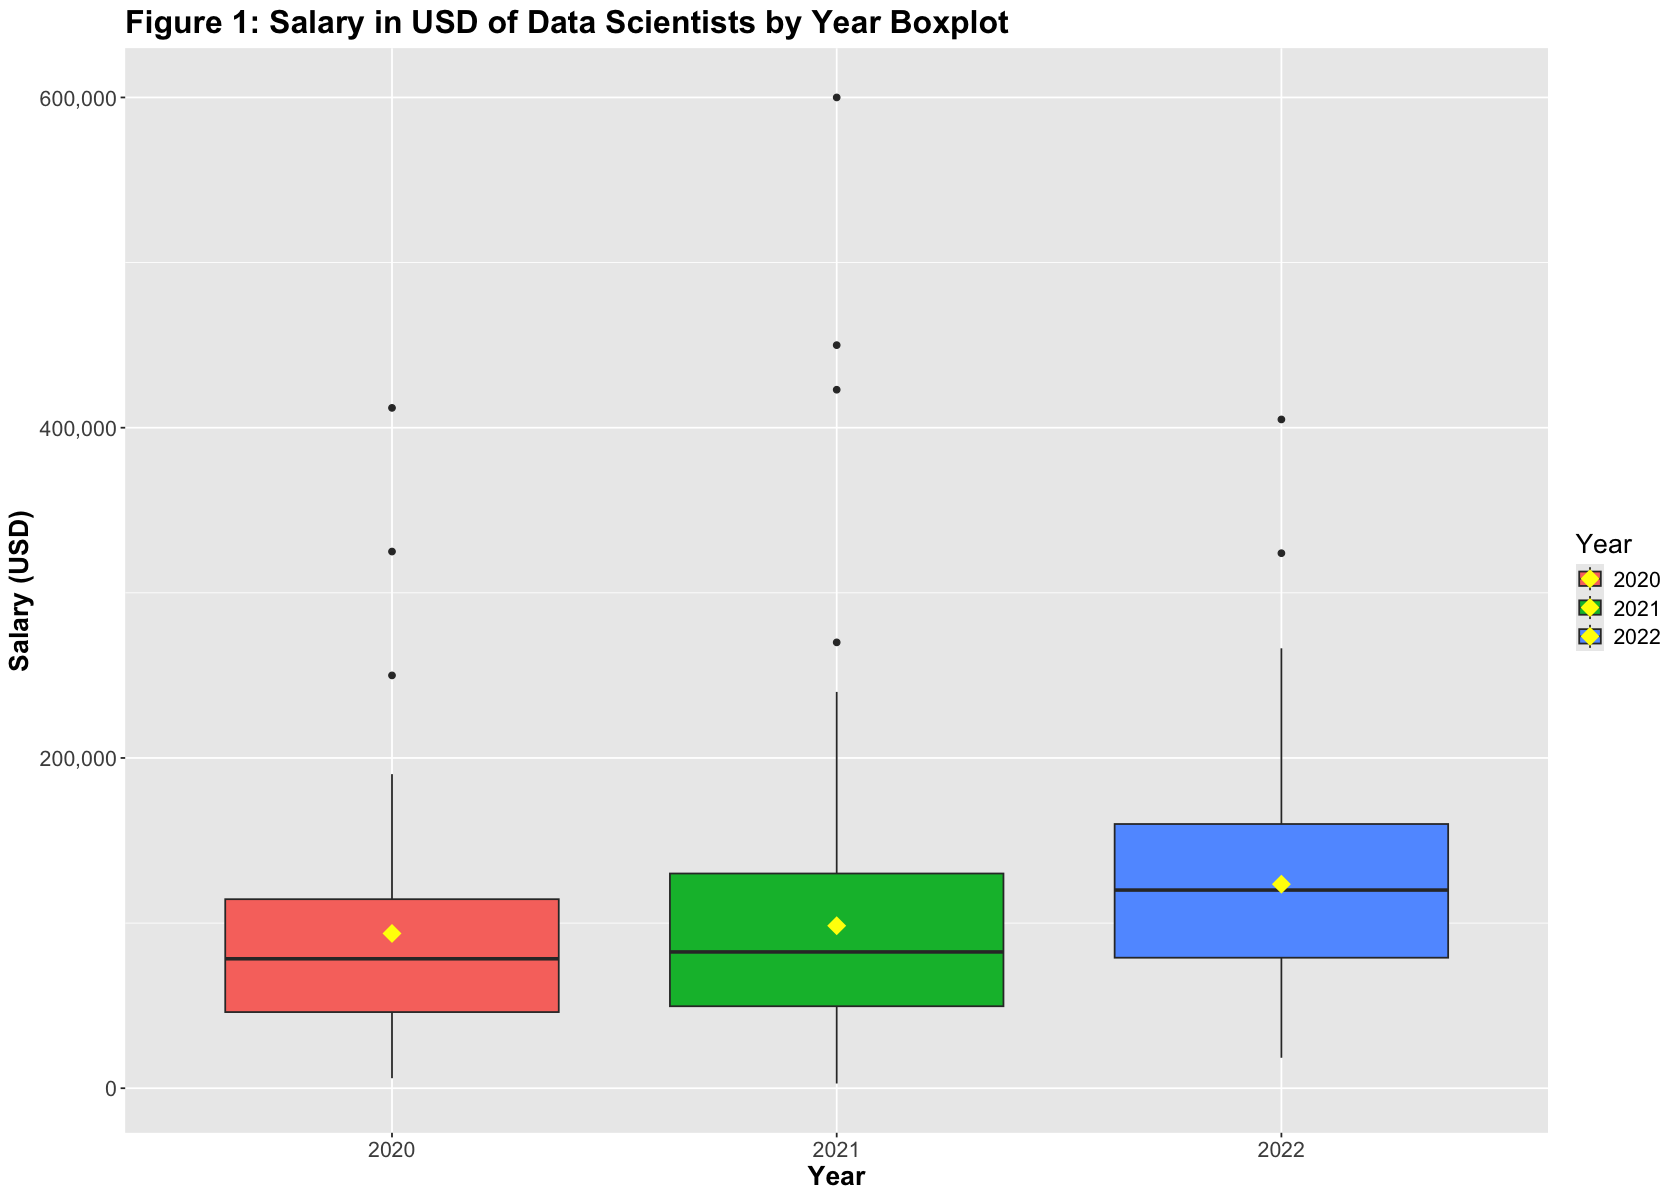

In [17]:
# Main developer: Eric
#Boxplot for salary in USD and year. A point is added indicating the mean.
salary_in_usd_work_year_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = work_year, y = salary_in_usd, fill = work_year)) +
    labs(x = "Year",
         y = "Salary (USD)",
         title = "Figure 1: Salary in USD of Data Scientists by Year Boxplot",
         fill = "Year") +
    stat_summary(aes(x = work_year, y = salary_in_usd, fill = work_year),
        fun = "mean", 
        colour = "yellow", 
        geom = "point", 
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_work_year_boxplots

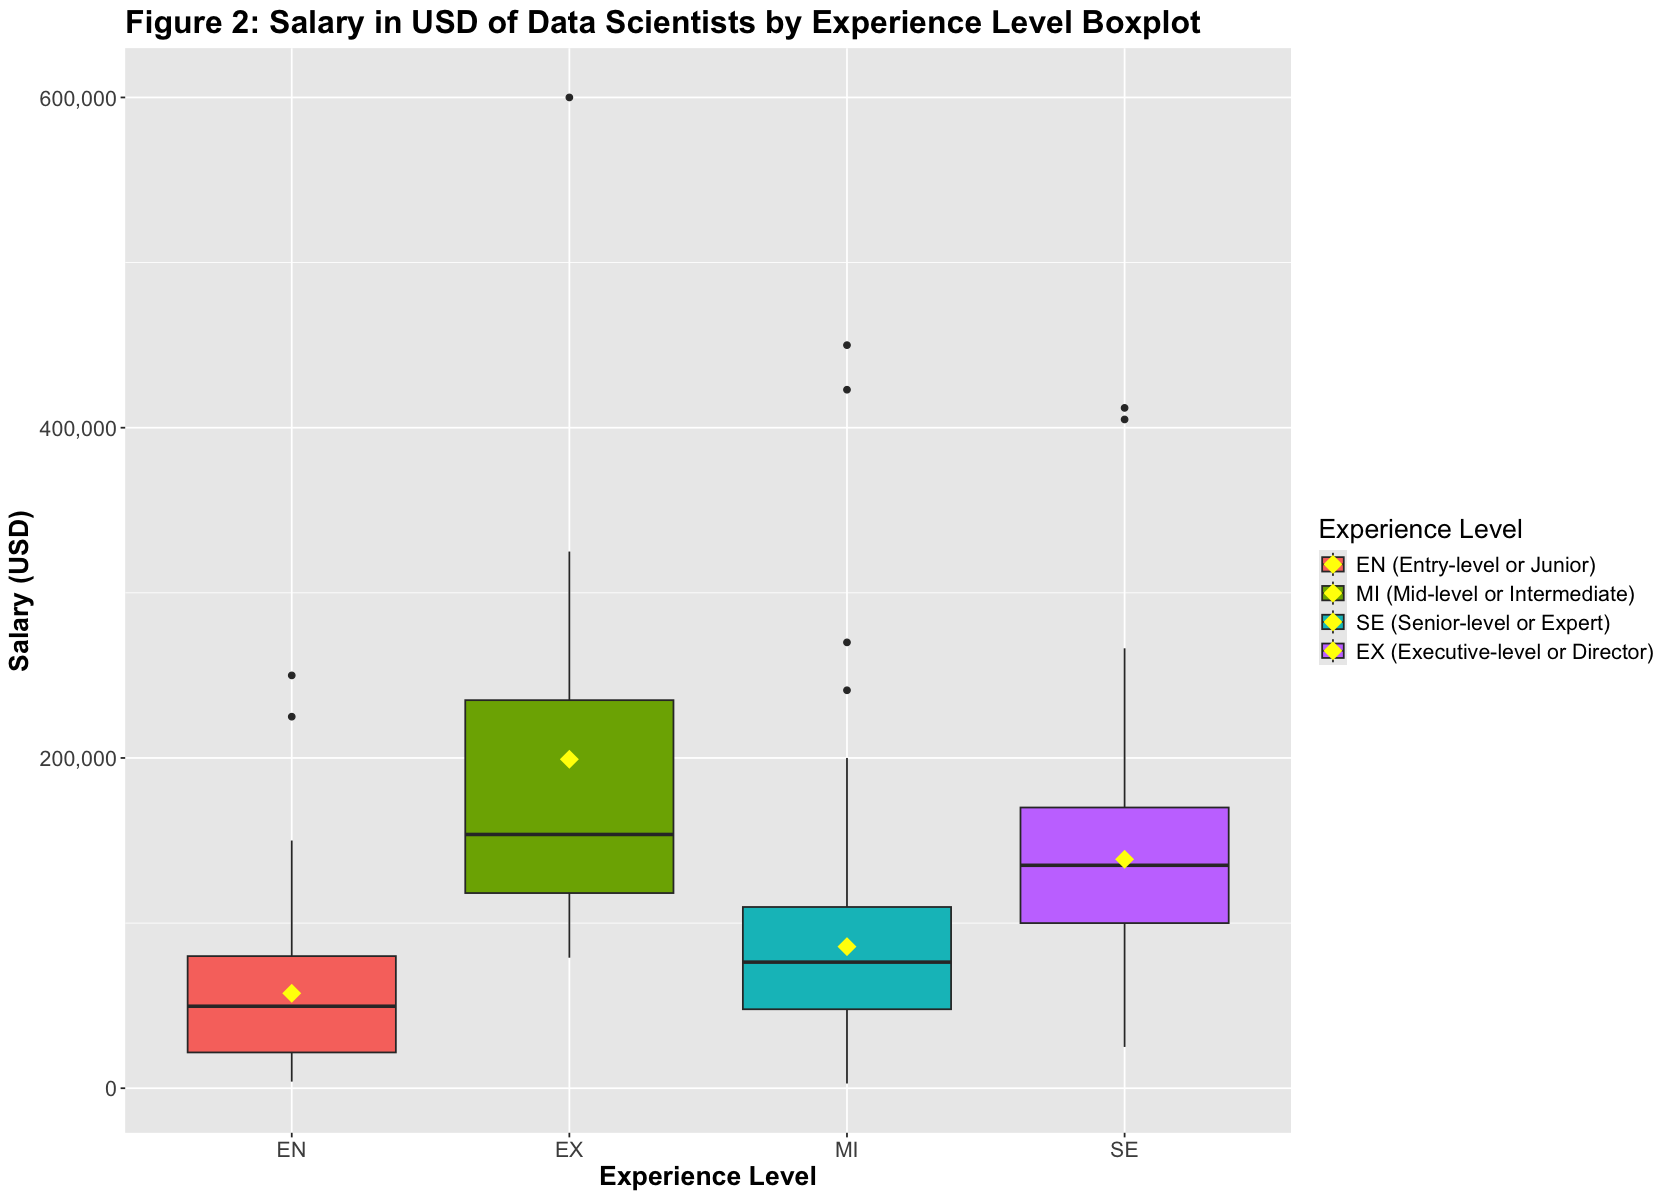

In [18]:
# Main developer: Eric
#Boxplot for salary in USD and experience level. A point is added indicating the mean.
salary_in_usd_experience_level_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = experience_level, y = salary_in_usd, fill = experience_level)) +
    labs(x = "Experience Level",
         y = "Salary (USD)",
         title = "Figure 2: Salary in USD of Data Scientists by Experience Level Boxplot",
         fill = "Experience Level") +
    stat_summary(aes(x = experience_level, y = salary_in_usd, fill = experience_level),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("EN (Entry-level or Junior)",
                              "MI (Mid-level or Intermediate)",
                              "SE (Senior-level or Expert)",
                              "EX (Executive-level or Director)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_experience_level_boxplots

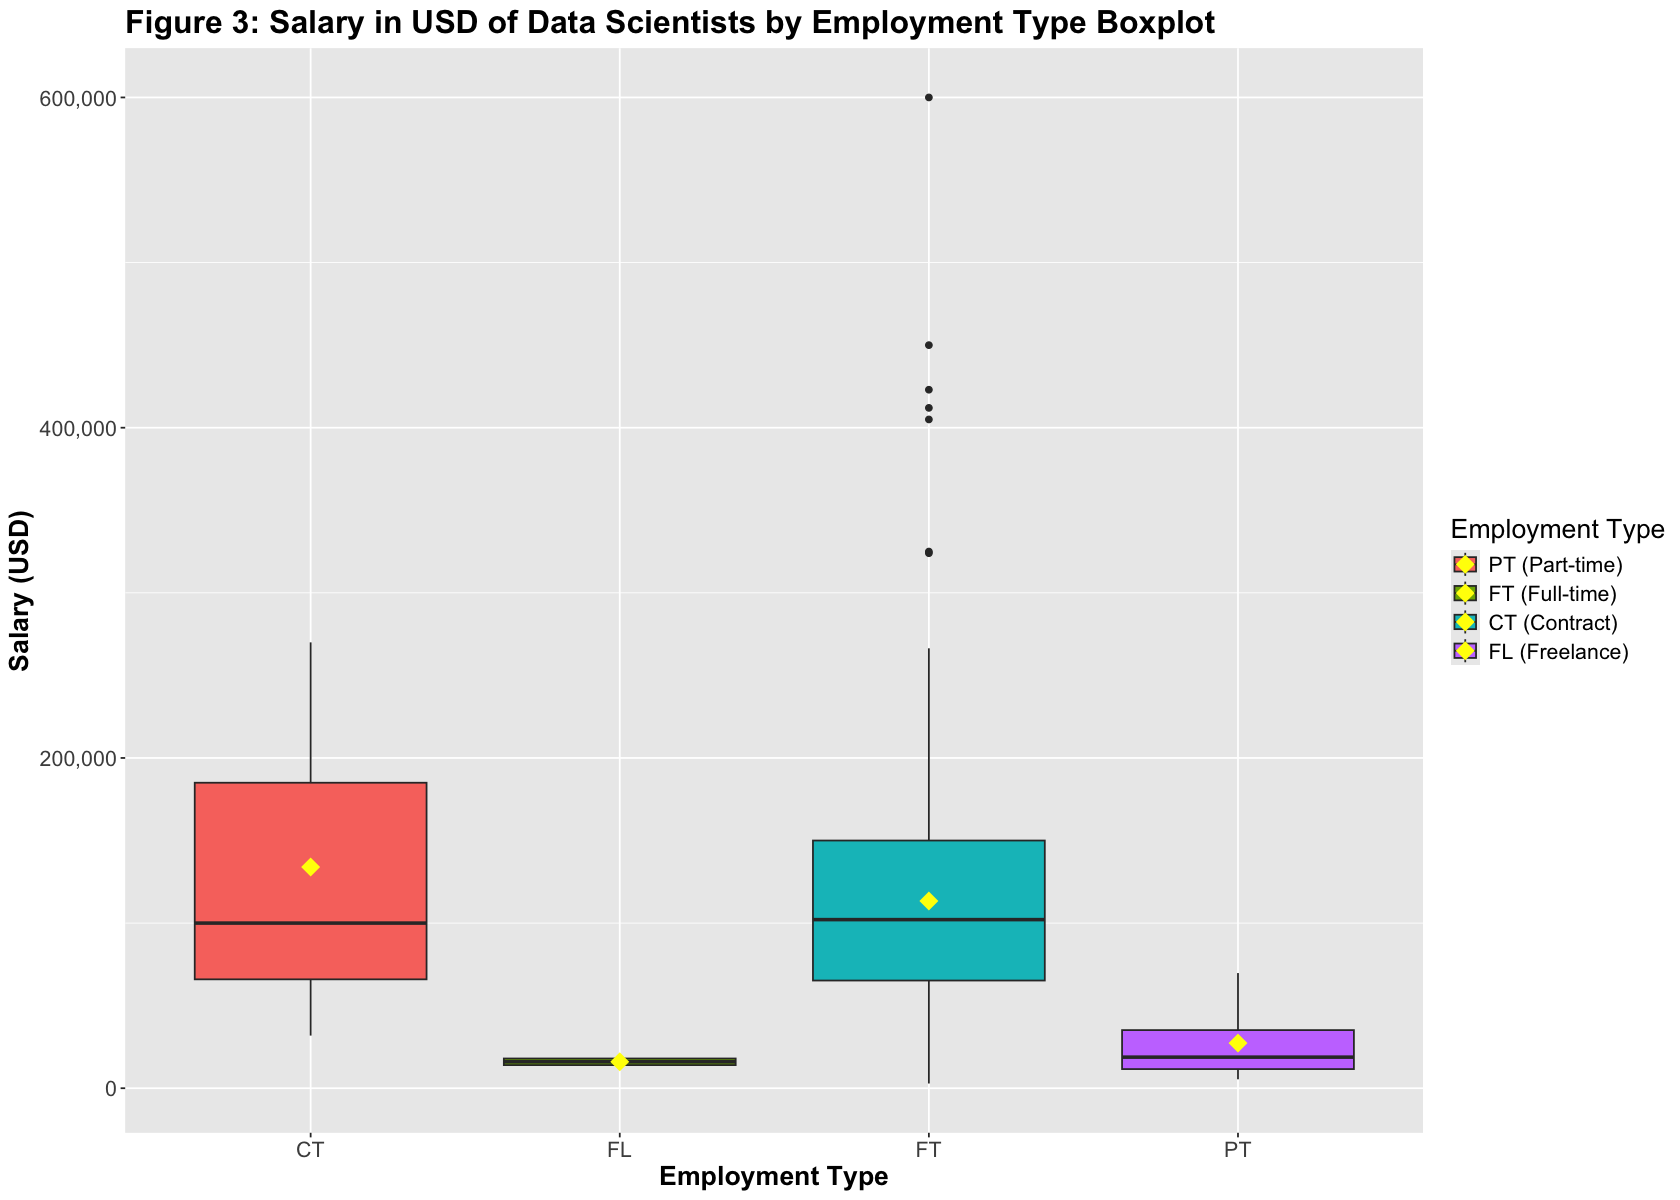

In [19]:
# Main developer: Eric
#Boxplot for salary in USD and employment type. A point is added indicating the mean.
salary_in_usd_employment_type_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = employment_type, y = salary_in_usd, fill = employment_type)) +
    labs(x = "Employment Type",
         y = "Salary (USD)",
         title = "Figure 3: Salary in USD of Data Scientists by Employment Type Boxplot",
         fill = "Employment Type") +
    stat_summary(aes(x = employment_type, y = salary_in_usd, fill = employment_type),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("PT (Part-time)",
                              "FT (Full-time)",
                              "CT (Contract)",
                              "FL (Freelance)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_employment_type_boxplots

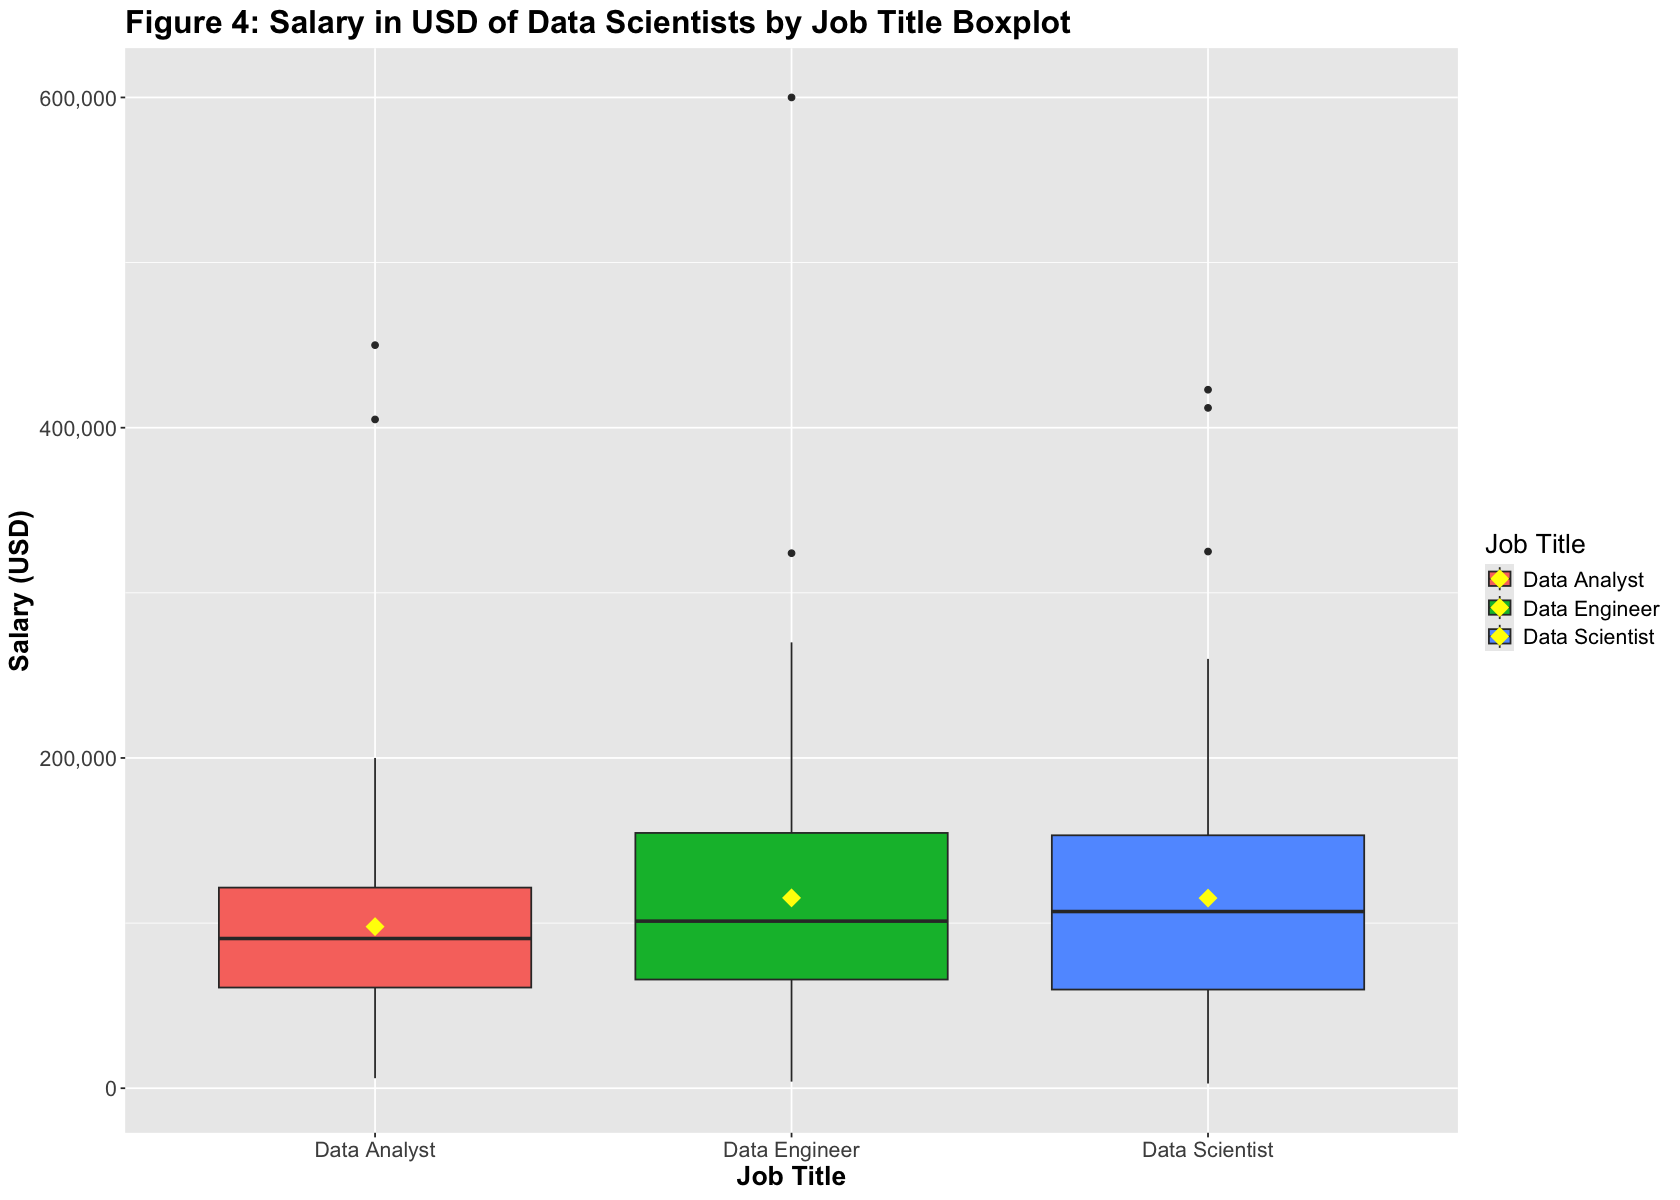

In [20]:
# Main developer: Eric
#Boxplot for salary in USD and job title. A point is added indicating the mean.
salary_in_usd_job_title_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = job_title, y = salary_in_usd, fill = job_title)) +
    labs(x = "Job Title",
         y = "Salary (USD)",
         title = "Figure 4: Salary in USD of Data Scientists by Job Title Boxplot",
         fill = "Job Title") +
    stat_summary(aes(x = job_title, y = salary_in_usd, fill = job_title),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_job_title_boxplots

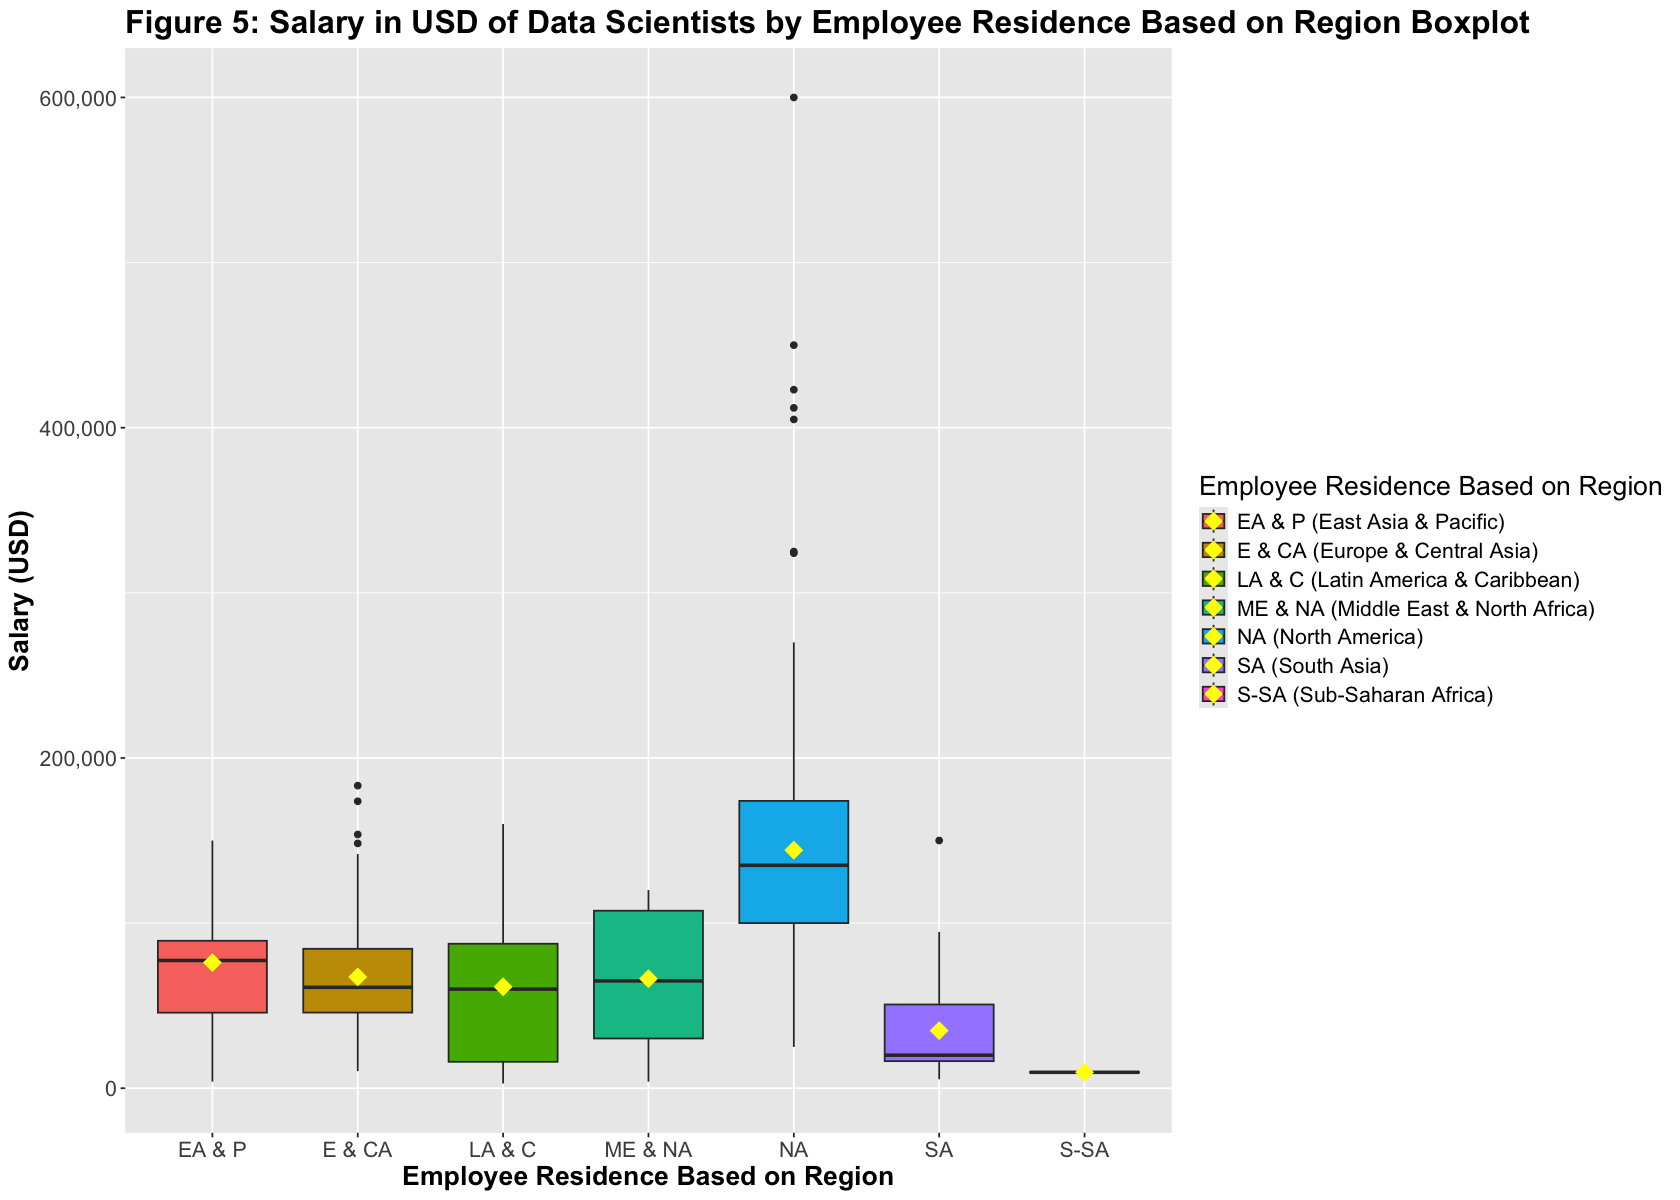

In [21]:
# Main developer: Eric
#Boxplot for salary in USD and employee residence. A point is added indicating the mean.
salary_in_usd_employee_residence_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = employee_residence, y = salary_in_usd, fill = employee_residence)) +
    labs(x = "Employee Residence Based on Region",
         y = "Salary (USD)",
         title = "Figure 5: Salary in USD of Data Scientists by Employee Residence Based on Region Boxplot",
         fill = "Employee Residence Based on Region") +
    stat_summary(aes(x = employee_residence, y = salary_in_usd, fill = employee_residence),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_x_discrete(labels = c("EA & P", 
                                  "E & CA", 
                                  "LA & C", 
                                  "ME & NA", 
                                  "NA", 
                                  "SA", 
                                  "S-SA")) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("EA & P (East Asia & Pacific)", 
                              "E & CA (Europe & Central Asia)", 
                              "LA & C (Latin America & Caribbean)", 
                              "ME & NA (Middle East & North Africa)", 
                              "NA (North America)", 
                              "SA (South Asia)", 
                              "S-SA (Sub-Saharan Africa)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_employee_residence_boxplots

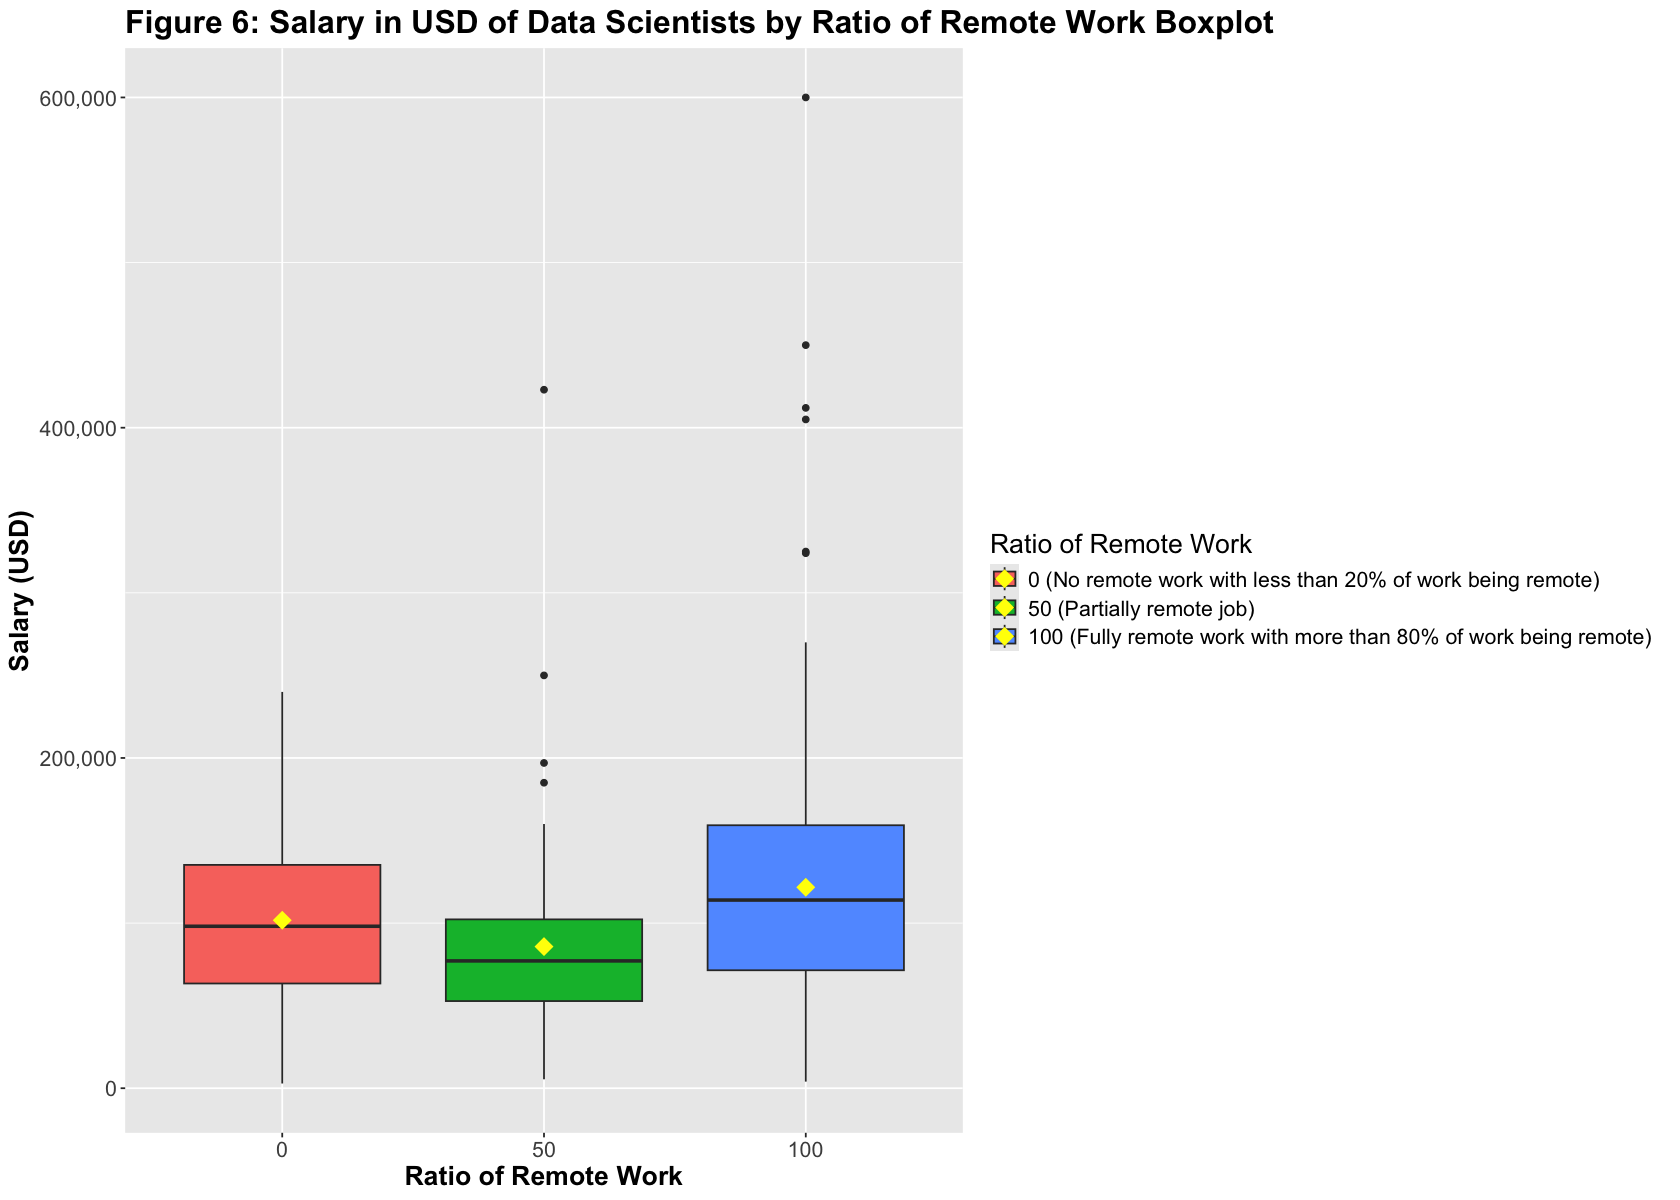

In [22]:
# Main developer: Eric
#Boxplot for salary in USD and the ratio of remote work. A point is added indicating the mean.
salary_in_usd_remote_ratio_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = remote_ratio, y = salary_in_usd, fill = remote_ratio)) +
    labs(x = "Ratio of Remote Work",
         y = "Salary (USD)",
         title = "Figure 6: Salary in USD of Data Scientists by Ratio of Remote Work Boxplot",
         fill = "Ratio of Remote Work") +
    stat_summary(aes(x = remote_ratio, y = salary_in_usd, fill = remote_ratio),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("0 (No remote work with less than 20% of work being remote)",
                              "50 (Partially remote job)",
                              "100 (Fully remote work with more than 80% of work being remote)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_remote_ratio_boxplots

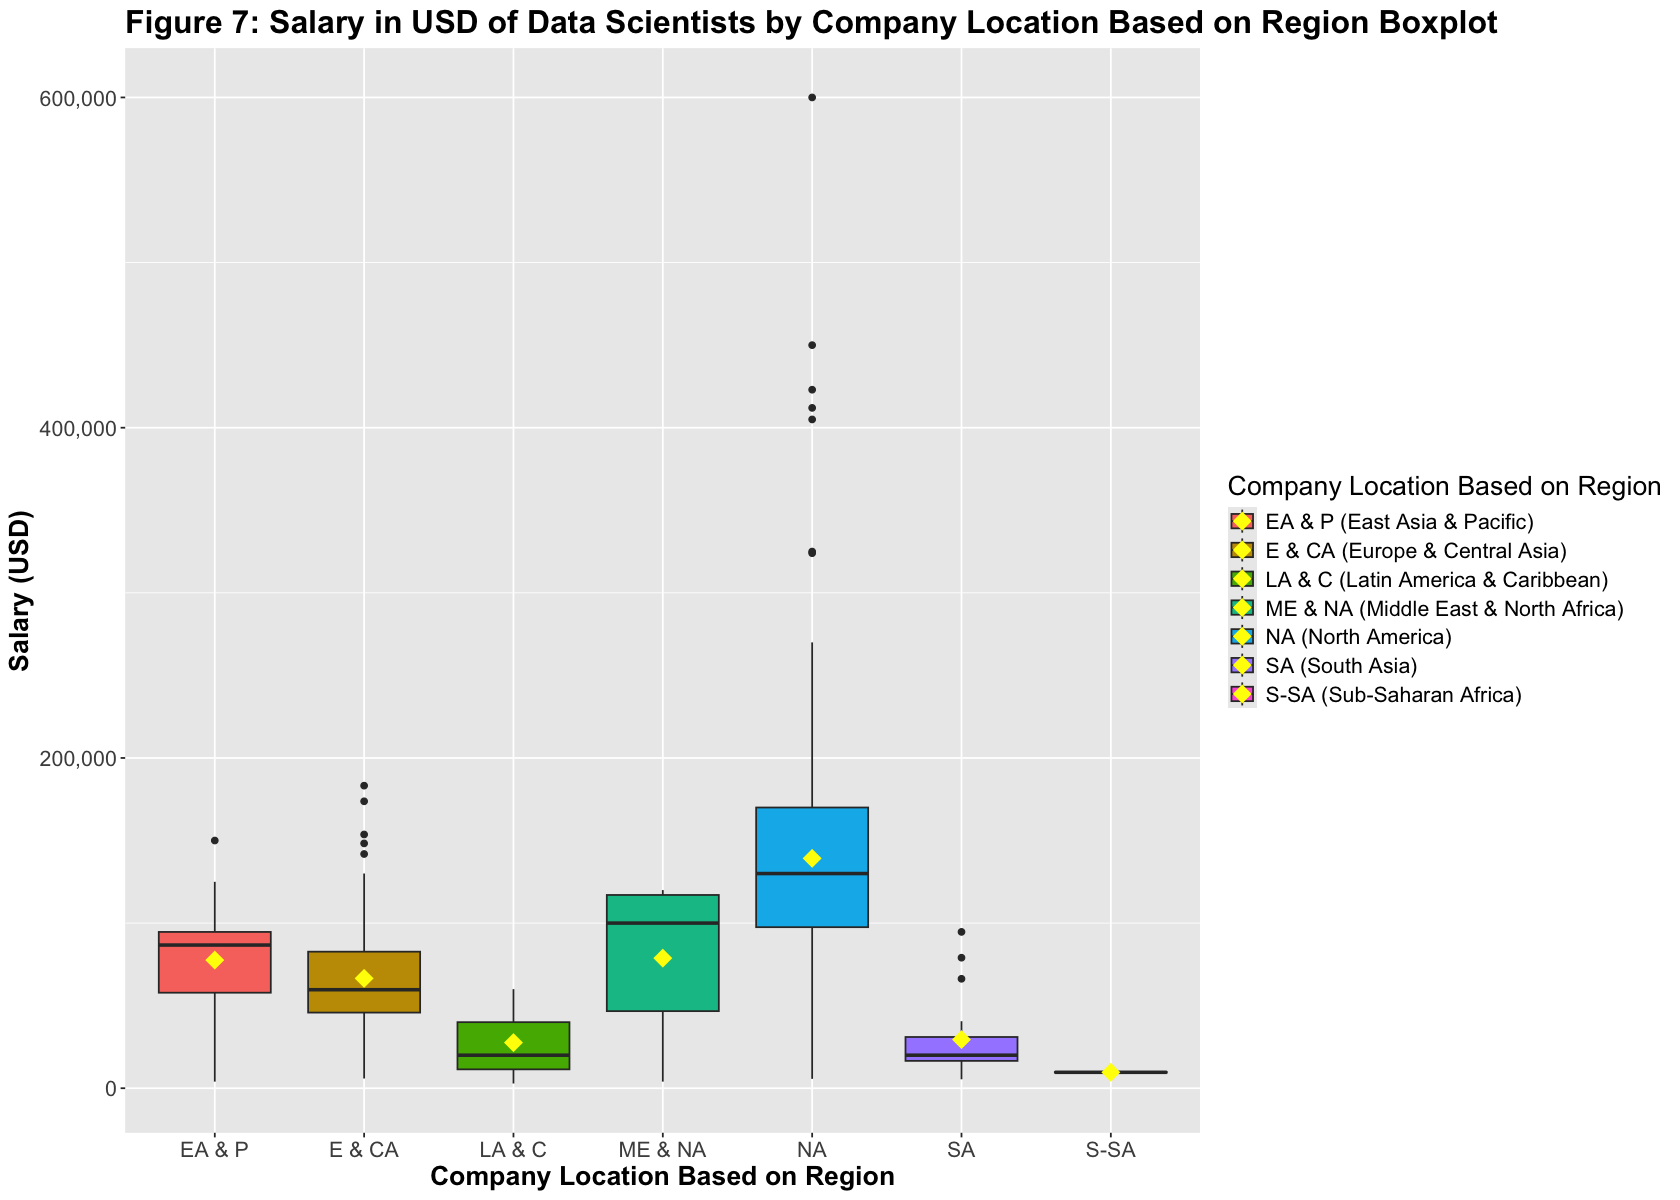

In [23]:
# Main developer: Eric
#Boxplot for salary in USD and company location. A point is added indicating the mean.
salary_in_usd_company_location_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = company_location, y = salary_in_usd, fill = company_location)) +
    labs(x = "Company Location Based on Region",
         y = "Salary (USD)",
         title = "Figure 7: Salary in USD of Data Scientists by Company Location Based on Region Boxplot",
         fill = "Company Location Based on Region") +
    stat_summary(aes(x = company_location, y = salary_in_usd, fill = company_location),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_x_discrete(labels = c("EA & P", 
                                  "E & CA", 
                                  "LA & C", 
                                  "ME & NA", 
                                  "NA", 
                                  "SA", 
                                  "S-SA")) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("EA & P (East Asia & Pacific)", 
                              "E & CA (Europe & Central Asia)", 
                              "LA & C (Latin America & Caribbean)", 
                              "ME & NA (Middle East & North Africa)", 
                              "NA (North America)", 
                              "SA (South Asia)", 
                              "S-SA (Sub-Saharan Africa)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

  

salary_in_usd_company_location_boxplots

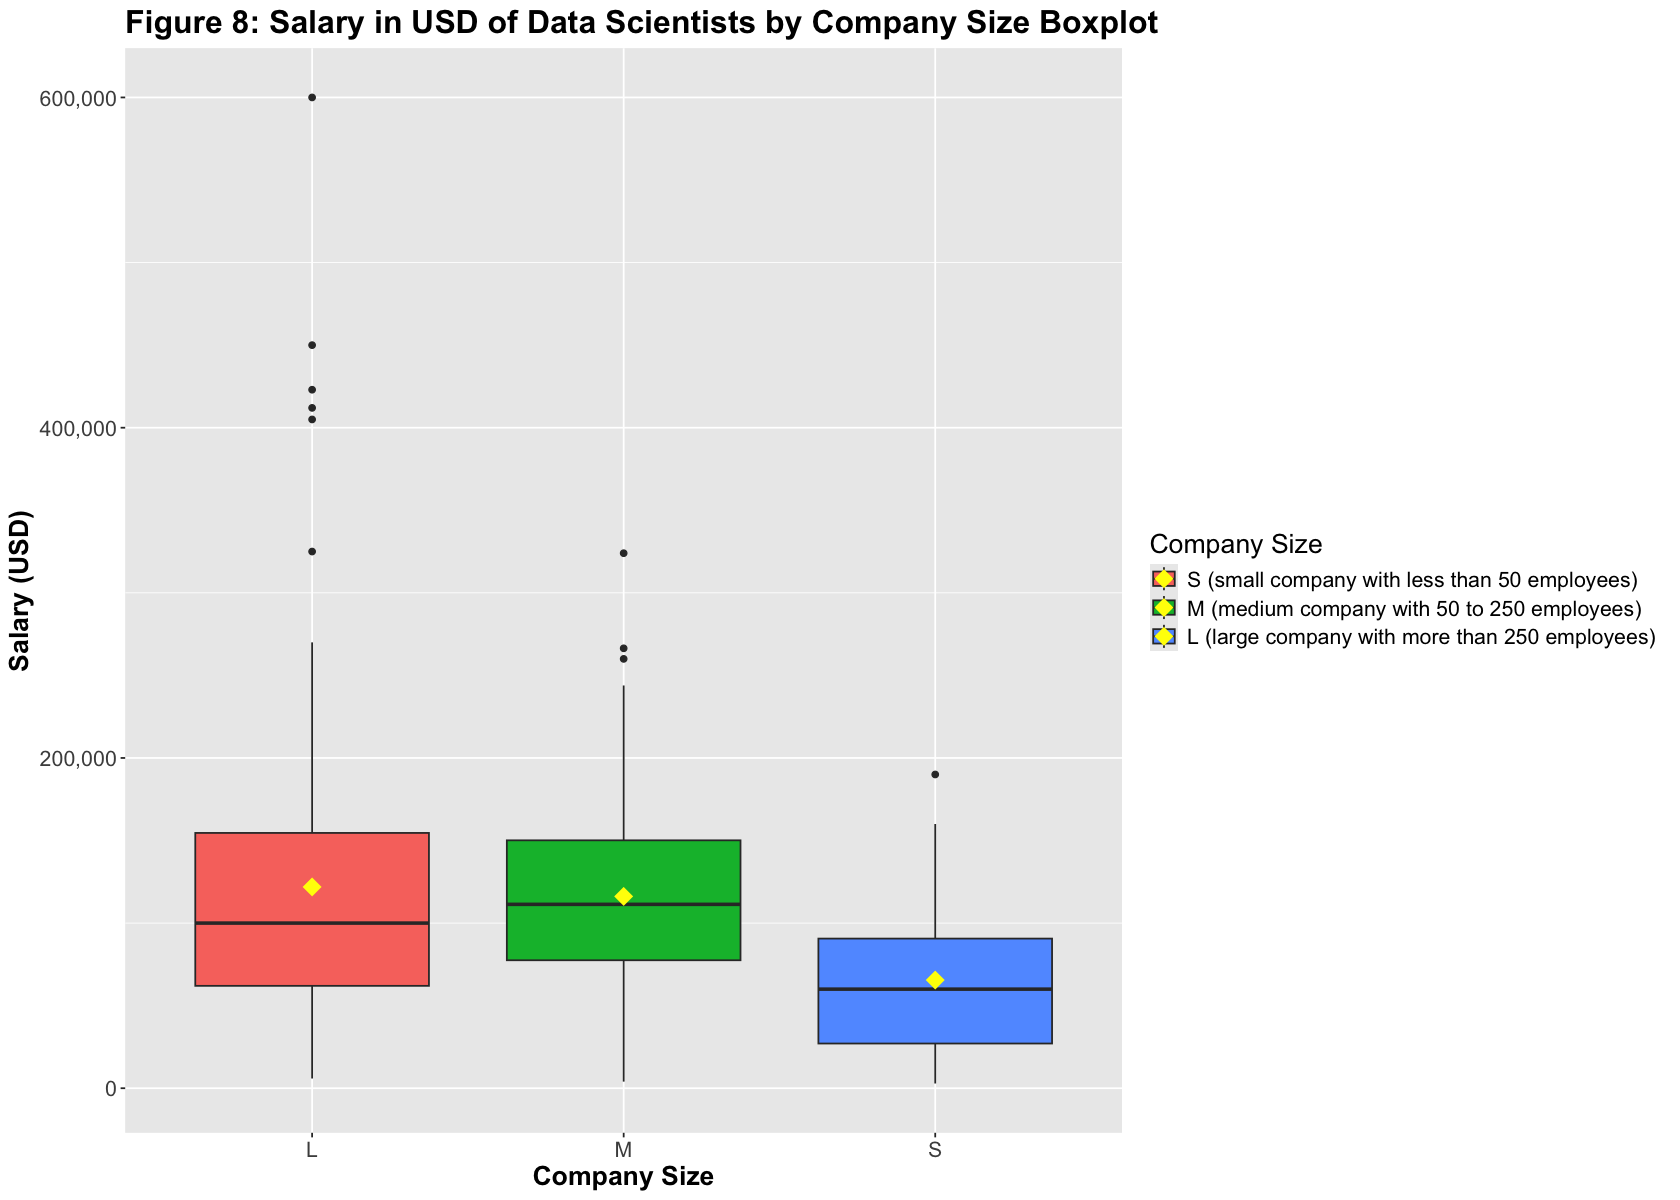

In [24]:
# Main developer: Eric
#Boxplot for salary in USD and company size. A point is added indicating the mean.
salary_in_company_size_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = company_size, y = salary_in_usd, fill = company_size)) +
    labs(x = "Company Size",
         y = "Salary (USD)",
         title = "Figure 8: Salary in USD of Data Scientists by Company Size Boxplot",
         fill = "Company Size") +
    stat_summary(aes(x = company_size, y = salary_in_usd, fill = company_size), 
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("S (small company with less than 50 employees)",
                              "M (medium company with 50 to 250 employees)",
                              "L (large company with more than 250 employees)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_company_size_boxplots

After viewing each visualization, a few notable observations appeared. The first is the similarity between the boxplots of `company_location` and `employee_residence` (only the Latin America & Caribbean boxplot look noticeably different). This could suggest that these variables are similar, might have data that overlaps with each other, and can potentially be correlated (non-independent), which means one of the variables might be excluded from the final model. The boxplots for `work_year` and `job_title` are also slightly similar. Logically, it is likely that this is a coincidence in the data, as it is fairly unlikely that year would be correlated with job titles, but it is still a possibility based on the visualizations. Another notable observation is that the variables with boxplots that appeared the most to be the most different were `experience_level`, `employment_type`, `company_location`, and `employee_residence`. This indicates it is likely that there is some association between `salary_in_usd` and these variables, so these variables will likely be the variables that will be included in the model we fit to the data.

`summarise()` has grouped output by 'company_location'. You can override using
the `.groups` argument.


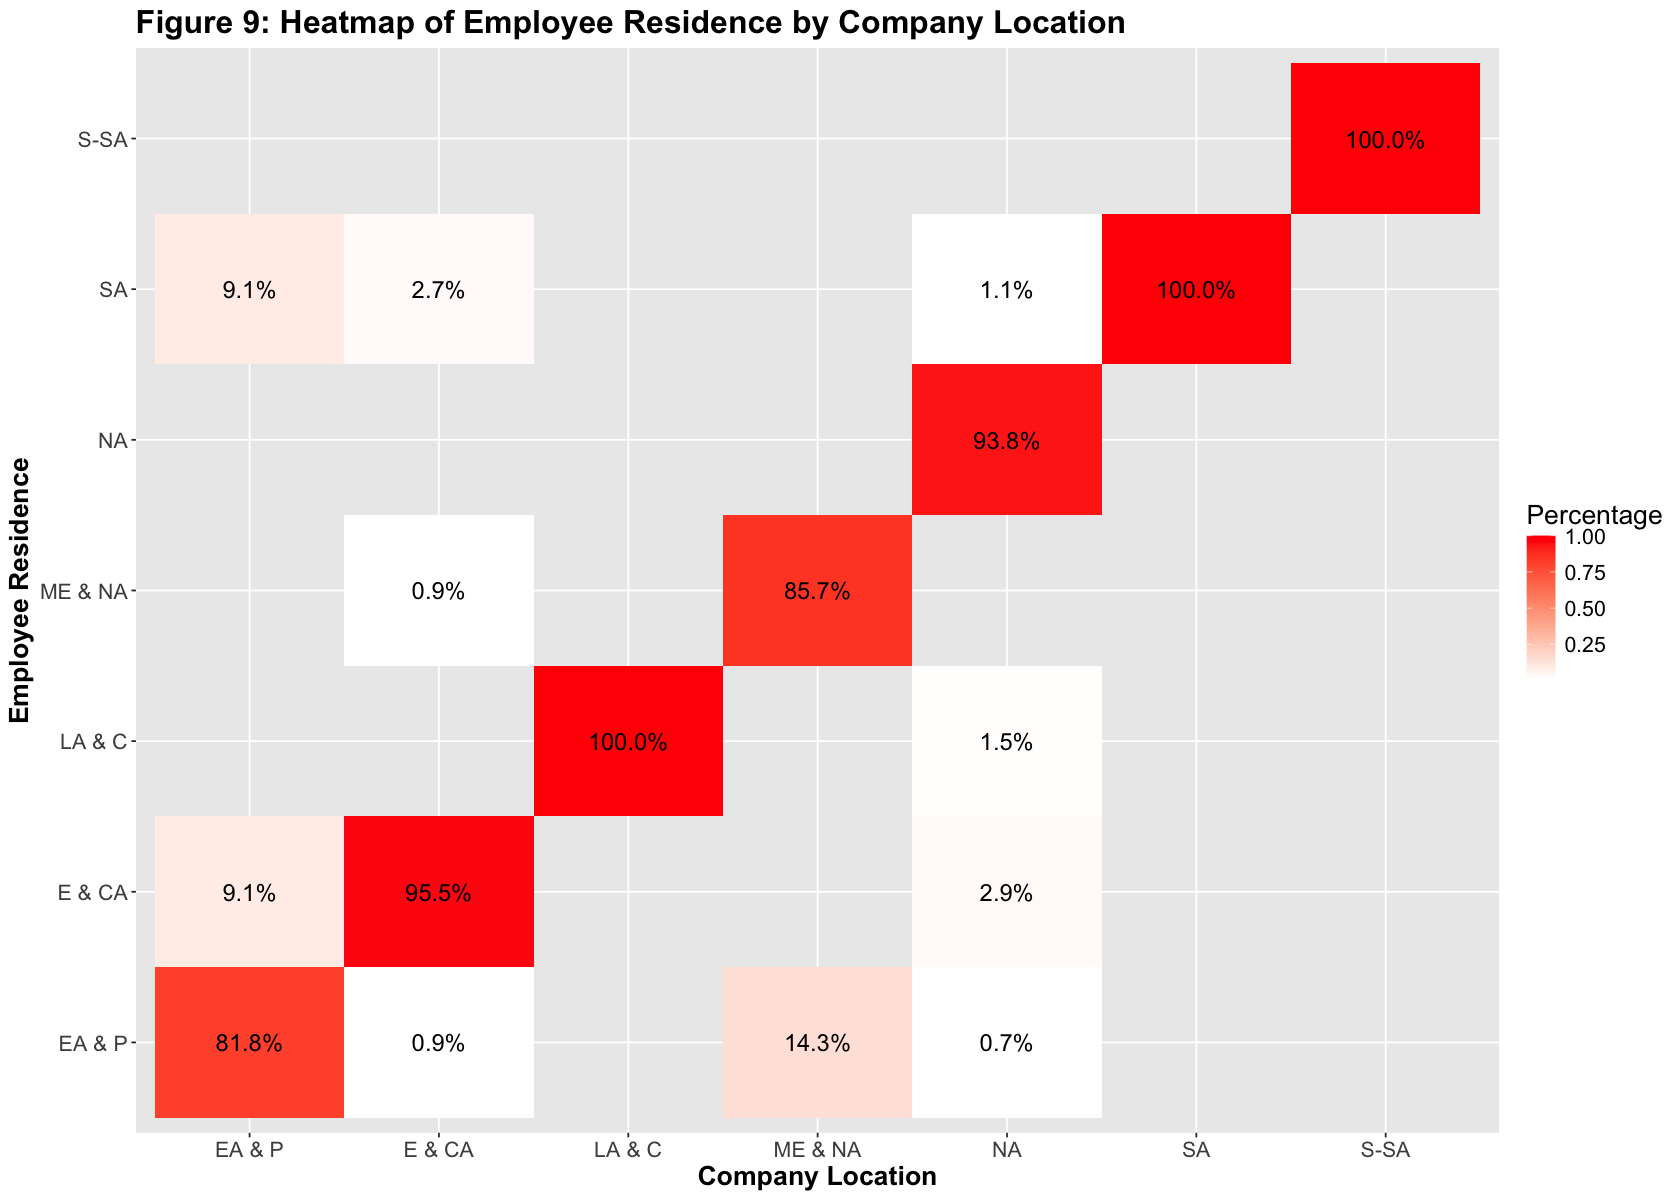

In [25]:
# Main developer: Stevan
# Heatmap for employee residence by company location.
summary_data <- ds_salaries_train %>%
    group_by(company_location, employee_residence) %>%
    summarise(count = n()) %>%
    mutate(percentage = count / sum(count))

employee_res_company_loc_heatmap <- ggplot(summary_data,
    aes(x = company_location, y = employee_residence, fill = percentage)) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "red", name = "Percentage") +
    labs(title = "Figure 9: Heatmap of Employee Residence by Company Location",
         x = "Company Location",
         y = "Employee Residence") +
    scale_x_discrete(labels = c("EA & P", 
                                "E & CA", 
                                "LA & C", 
                                "ME & NA", 
                                "NA", 
                                "SA", 
                                "S-SA")) +
    scale_y_discrete(labels = c("EA & P", 
                                "E & CA", 
                                "LA & C", 
                                "ME & NA", 
                                "NA", 
                                "SA", 
                                "S-SA")) +
    theme(text = element_text(size = 16),
          plot.title = element_text(face = "bold"),
          axis.title = element_text(face = "bold", size = 16)) +
    stat_summary(fun = mean, geom = "text",
                 aes(label = scales::percent(percentage, accuracy = 0.1)),
                 color = "black",
                 size = 5)

employee_res_company_loc_heatmap

It's clear that `company_location` and `employee_residence` are highly correlated and are the same the majority of the time, with most employees residing in the region where they work. The regions with the most companies with employees working from abroad are East Asia & Pacific and Middle East & North Africa, with around 15-20% of employees working from abroad. During our variable selection process, we expect one of these two variables to be dropped which may result in some information being lost. To account for this, we will encode the interaction between `company_location` and `employee_residence` as a new variables `works_abroad`, which is "Yes" if both locations match and "No" otherwise.

In [26]:
# Main developer: Stevan
add_works_abroad <- function(data) {
    data |> mutate(works_abroad = ifelse(employee_residence != company_location, "Yes", "No"))
}
ds_salaries_train <- add_works_abroad(ds_salaries_train)
ds_salaries_sel <- add_works_abroad(ds_salaries_sel)
ds_salaries_test <- add_works_abroad(ds_salaries_test)

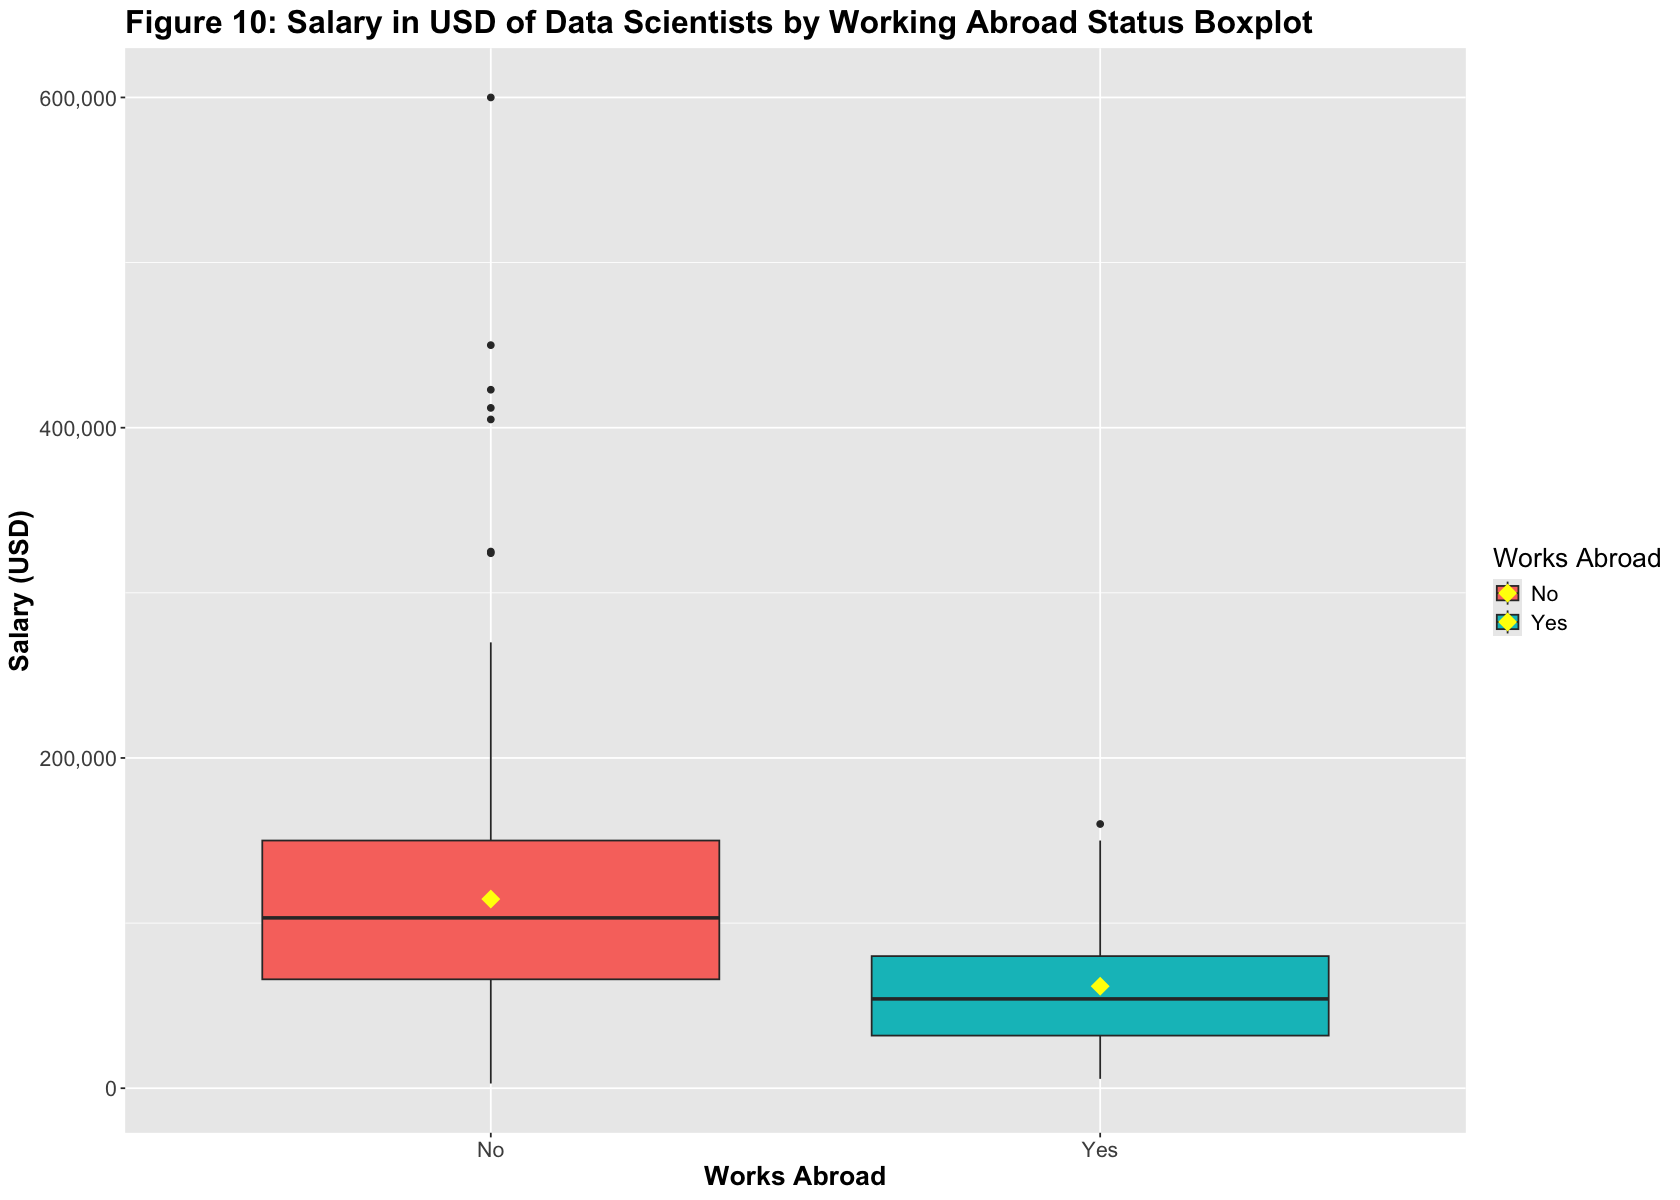

In [27]:
# Main developer: Stevan
# Boxplot for salary in USD and working abroad status. A point is added indicating the mean.
salary_in_company_size_boxplots <- ds_salaries_train |>
    ggplot() +
    geom_boxplot(aes(x = works_abroad, y = salary_in_usd, fill = works_abroad)) +
    labs(x = "Works Abroad",
         y = "Salary (USD)",
         title = "Figure 10: Salary in USD of Data Scientists by Working Abroad Status Boxplot",
         fill = "Works Abroad") +
    stat_summary(aes(x = works_abroad, y = salary_in_usd, fill = works_abroad), 
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("No", "Yes")) +
    theme(text = element_text(size = 16),
          plot.title = element_text(face = "bold"),
          axis.title = element_text(face = "bold", size = 16))

salary_in_company_size_boxplots

There seems to be some correlation between `works_abroad` and `salary_in_usd`, but not as much as with `experience_level`, `employment_type`, `company_location`, or `employee_residence`.

### Methods and Plan

We will use forward stepwise selection to select the input variables that will be used in the MLR. This process involves starting with an intercept-only model then adding the best variables at each step according to some scoring metric one by one to the model. The model with the highest scoring metric overall is then selected and determined to be the best model. The metric we have chosen is R-Squared ($R^2$), since it is a simple and interpretable metric, being understood as how much variance in the response can be explain by the model adjusted by the number of covariates. It is also a metric that penalizes more complex models, which is what we want during variable selection so our final model is more understandable.

Since many of our dataset's features are categorical we will be using the `stepwise` function from the `StepReg` library rather than the `regsubsets` function from the `leaps` library to perform forward selection. This is because `stepwise` will select all values for a particular factor variable or none at all, while `regsubsets` will select different values for a factor variable individually.

In [1]:
# Main developer: Stevan
# added a comment to code: Anna

# Forward Selection on selection dataset
forward_result <- stepwise(
    salary_in_usd ~ .,
    type = "linear", metric = c("adjRsq"),
    data = ds_salaries_sel, strategy = "forward"
)

plot(forward_result)

ERROR: Error in stepwise(salary_in_usd ~ ., type = "linear", metric = c("adjRsq"), : could not find function "stepwise"


The selected variables from the forward selection process are employee_residence, experience_level, job_title and company_size, in that order.

In [29]:
# Main developer: Anna
# Contributor: Stevan (changed selected variables)
# Fit an additive multiple linear regression model
mlr_model <- lm(
    salary_in_usd ~ employee_residence + experience_level + job_title + company_size,
    data = ds_salaries_train
)

# Display the summary of the model to see coefficients and statistics
tidy(mlr_model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),54786.63,17583.410,3.1158140,1.963372e-03
employee_residenceEurope & Central Asia,-19940.91,15211.311,-1.3109263,1.906164e-01
employee_residenceLatin America & Caribbean,-21913.08,24197.217,-0.9056035,3.656776e-01
employee_residenceMiddle East & North Africa,-16063.76,24028.738,-0.6685230,5.041760e-01
employee_residenceNorth America,50114.05,15297.526,3.2759580,1.142580e-03
employee_residenceSouth Asia,-51477.57,17796.361,-2.8925895,4.024418e-03
employee_residenceSub-Saharan Africa,-16971.23,39903.310,-0.4253088,6.708347e-01
experience_levelEX,110665.76,14518.850,7.6222121,1.749251e-13
experience_levelMI,12683.50,8454.842,1.5001457,1.343463e-01


Interpretation: Coefficient Analysis

Here is our coefficient analysis based on the information provided by the table above.

##### Employee Residence:

We can see that employee residence significantly influences salary outcomes. The reference category is the East Asia and Pacific location.

- Europe & Central Asia: The coefficient estimate is 	-19940.91, suggesting that, compared to employees in East Asia and Pacific, mid-level employees earn about $19940.91 less. However, this level is not statistically significant as the p-value is 0.191, which is greater than our established significance level of 0.05. Therefore there is no statistical difference between salaries from Europe & Central Asia and East Asia and Pacific. 

- Latin America & Caribbean: The coefficient estimate is 	-21913.08, suggesting that, compared to employees in East Asia and Pacific, mid-level employees earn about $21913.08 less. However, this level is not statistically significant as the p-value is 0.366, which is greater than our established significance level of 0.05.

- Middle East & North Africa: The coefficient estimate is 	-16063.76, suggesting that, compared to employees in East Asia and Pacific, mid-level employees earn about $16063.76 less. However, this level is not statistically significant as the p-value is 0.504, which is greater than our established significance level of 0.05.

- North America: The coefficient estimate is 	50114.05	, suggesting that, compared to employees in East Asia and Pacific, mid-level employees earn about $50114.05	 more. This level is statistically significant as the p-value is 0.001, which is less than our established significance level of 0.05. Therefore there is a statistically significant difference between salaries from North America and East Asia and Pacific. 

- South Asia: The coefficient estimate is 	-51477.57	, suggesting that, compared to employees in East Asia and Pacific, mid-level employees earn about $51477.57	 less. This level is statistically significant as the p-value is 0.004, which is less than our established significance level of 0.05.

- Sub-Saharan Africa: The coefficient estimate is 	-16971.23	, suggesting that, compared to employees in East Asia and Pacific, mid-level employees earn about $16971.23	 less. This level is not statistically significant as the p-value is 0.671, which is greater than our established significance level of 0.05.


##### Experience Level
Experience level significantly influences salary outcomes, with the entry level serving as the reference category:

- Executive Level (EX): The coefficient estimate is 110665.76, suggesting that, compared to entry-level employees, executive level employees earn about $126,150 more. This level is statistically significant as the p-value is much smaller than our established significance level of 0.05.

- Mid Level (MI): The coefficient estimate is 12683.50, suggesting that, compared to entry-level employees, mid-level employees earn about $12683.50 more. However, this level is not statistically significant as the p-value is 0.134, which is greater than our established significance level of 0.05.

- Senior Level (SE): The coefficient estimate is 38731.18	, suggesting that, compared to entry-level employees, senior level employees earn about $38731.18	 more. This level is statistically significant as the p-value is 0.0000118, which is smaller than our established significance level of 0.05.


##### Job Title
Job title significantly influences salary outcomes, the reference group is Data Analyst.

- it appears both the Data Engineer and Data Scientist levels are statistically significant since both their p-values (0.0053 and 0.0017 respectively) are less than 0.05. Therefore there is a statistically significant difference between salaries accross the job titles. 


##### Company Size
Company size significantly influences salary outcomes, the reference group is the L company size.

-  it appears both the Small and Medium levels are statistically significant since both their p-values (0.0007 and 0.0014 respectively) are less than 0.05. Therefore there is a statistically significant difference between salaries accross the company size. 

#### Adjusted R-Squared

Next we will take a look at thte adjusted R squared value. We chose adjusted R squared over R squared to avoid overfitting and adding unnecessary predictors.

In [30]:
# Main developer: Stevan
adjusted_r_squared <- function(model, data, response_var) {
  n <- nrow(data)  
  p <- length(model$coefficients) - 1
  
  # Predict the response variable on the test set
  predictions <- predict(model, newdata = data)
  
  # Calculate the total sum of squares (TSS)
  tss <- sum((data[[response_var]] - mean(data[[response_var]]))^2)
  
  # Calculate the residual sum of squares (RSS)
  rss <- sum((data[[response_var]] - predictions)^2)
  
  # Calculate the R-squared
  r_squared <- 1 - (rss / tss)
  
  # Calculate the adjusted R-squared
  adj_r_squared <- 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
  
  return(adj_r_squared)
}

In [31]:
# Main developer: Stevan
adjusted_r_squared(mlr_model, ds_salaries_train, "salary_in_usd")

[1] 0.4782853

Model has an adjusted R-Squared value of 0.4783 on the training set. This means our model explains 47.8% of the variation in Salary in USD for the testing data.

In [32]:
# Main developer: Stevan
adjusted_r_squared(mlr_model, ds_salaries_test, "salary_in_usd")

[1] 0.315074

Model has an adjusted R-Squared value of 0.3151 on the test set. This means our model explains 31.5% of the variation in Salary in USD for the testing data.

It is normal for our R-Squared value for the training set to be lower than our testing set since our model has already "seen" the data. Our R-Squared value might be low, but in the context of predicting salaries it can be considered acceptable based on the some very complex factors outside of the scope of our dataset. Such as economy, industry, education, skills, and market demand. For example, during COVID-19, there was a surge in the technology sector salaries, something like this wouldn't be captured in our dataset.

However it is worth acknowledging that an interactive model may capture the variation in salaries better.

### Verifying Model Assumptions

In our linear model, the assumptions we need to test for are:
  - Linear relationship between reponse and predictor variables
  - Errors are independent
  - Conditional distribution of the error terms is Normal
  - Equal variance of the error terms
  - Multicollinearity

`geom_smooth()` using formula = 'y ~ x'


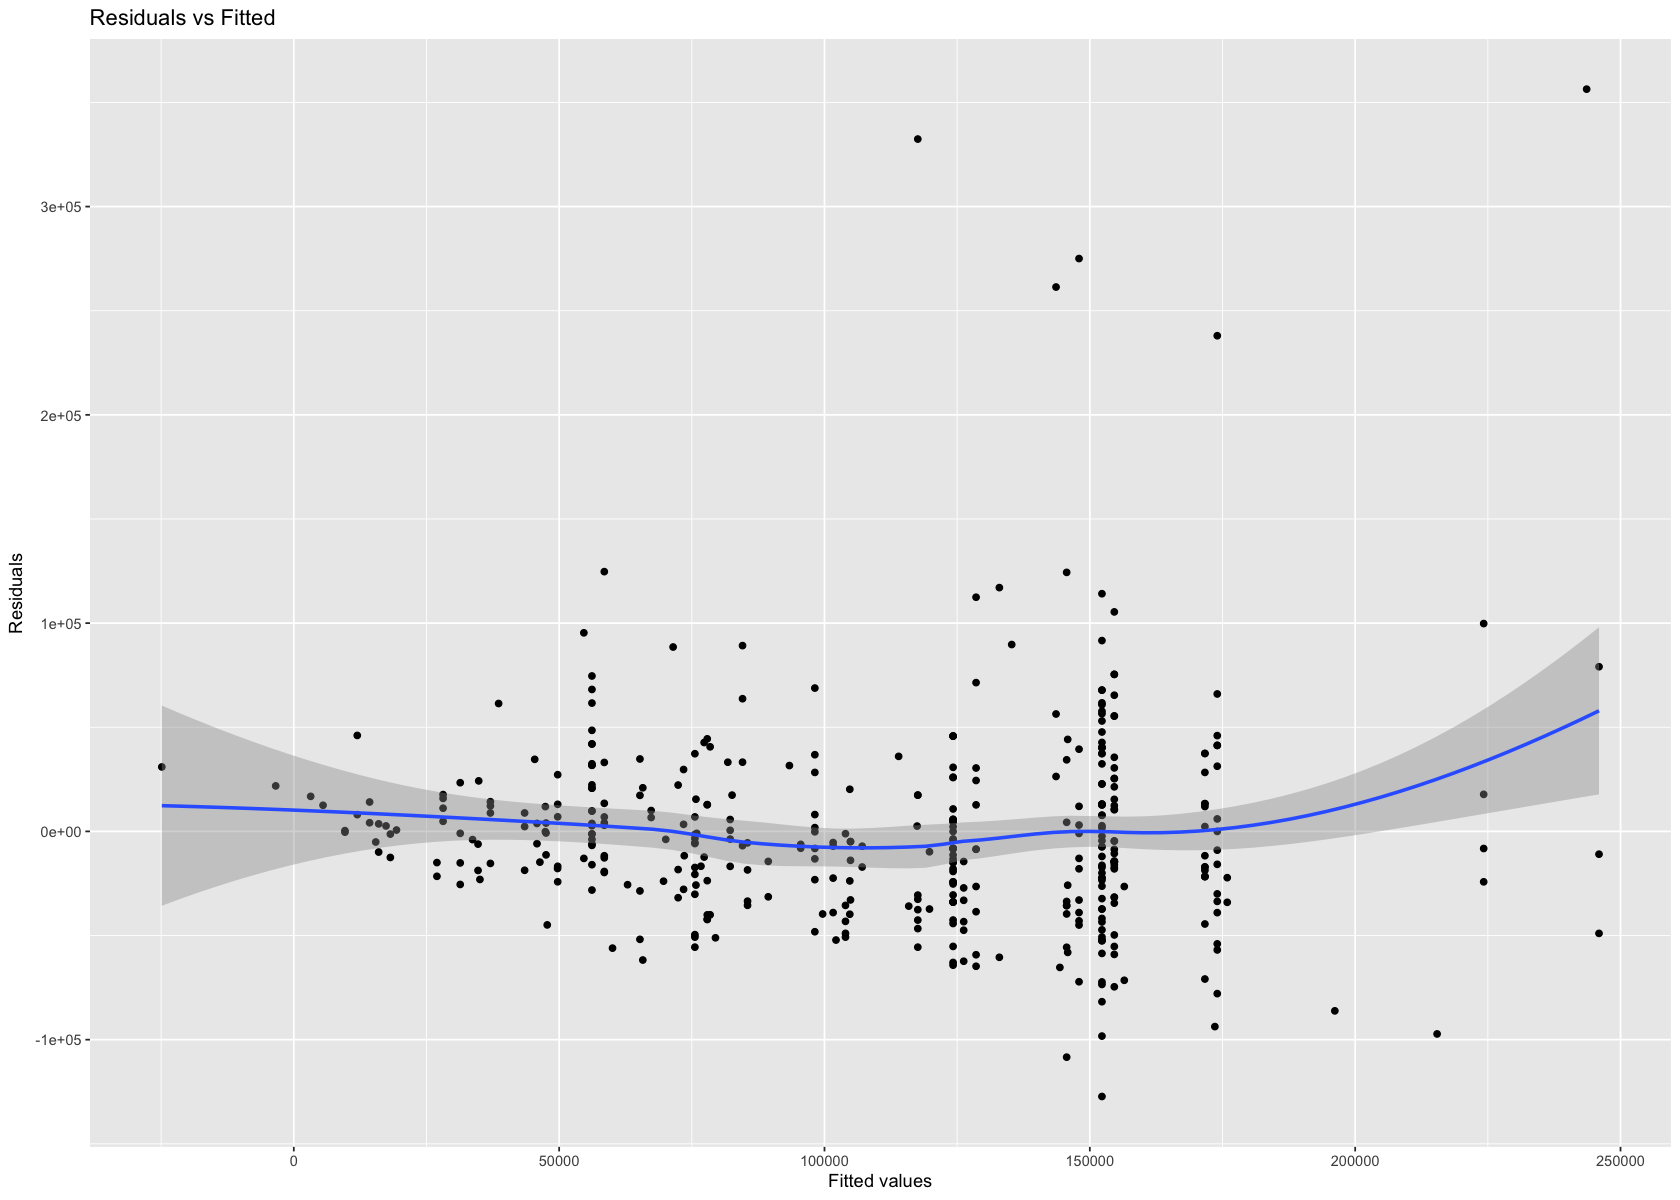

In [33]:
# Main developer: Stevan
# Linearity and heteroscedasticity: Residual plot
ggplot(mlr_model, aes(.fitted, .resid)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Residuals vs Fitted", x = "Fitted values", y = "Residuals")

In the residual plot of the error terms above, we see that there is a funnel shape that suggests heteroscedasticity. This will not affect our coefficient values but inflate the standard errors and compromise our confidence intervals and hypothesis testing.

[1]   6 380

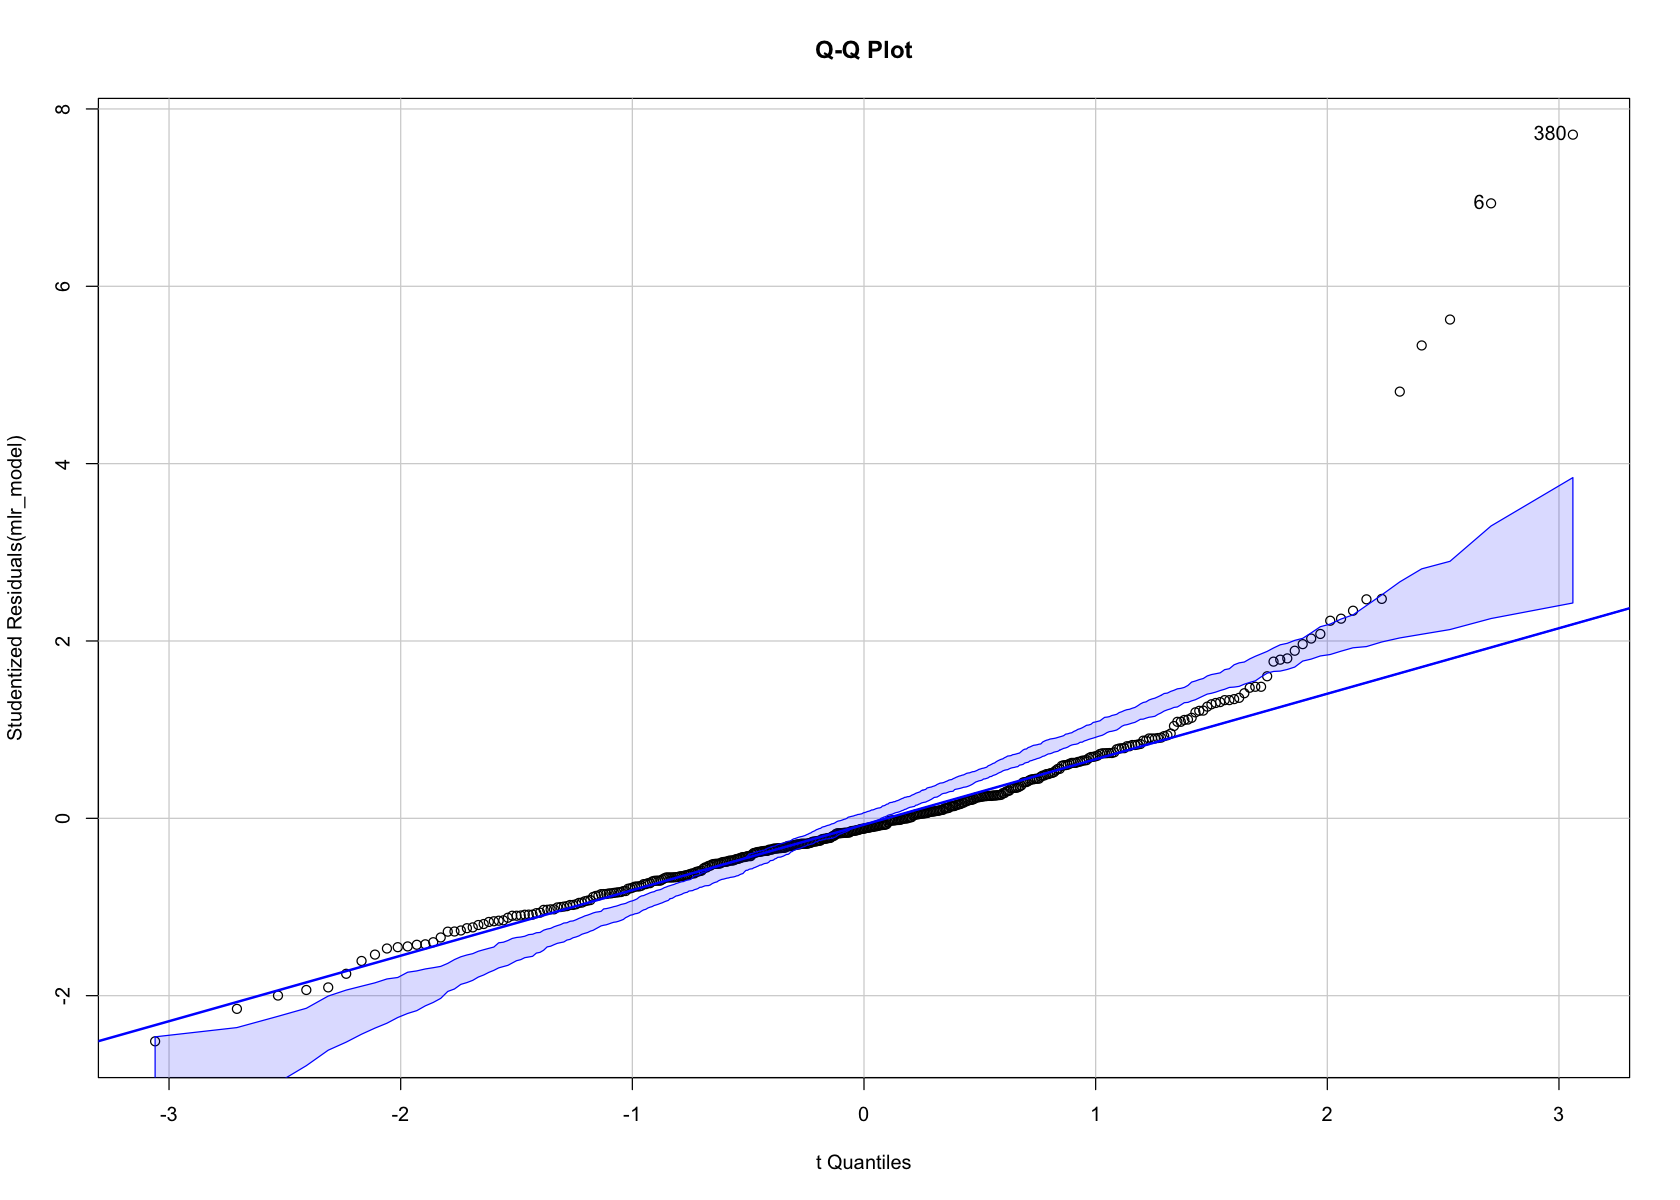

In [34]:
# Main developer: Stevan
# Normality of residuals: Q-Q plot
qqPlot(mlr_model, main = "Q-Q Plot")

The QQplot above suggests non-normality which may affect the sampling distribution and standard errors. However since we have 607 observations this issue should be partially solved by the CLT.

In [35]:
# Main developer: Stevan
# Multicollinearity: Variance Inflation Factor (VIF)
vif(mlr_model)

,GVIF,Df,GVIF^(1/(2*Df))
employee_residence,1.672657,6,1.043800
experience_level,1.499416,3,1.069844
job_title,1.116665,2,1.027971
company_size,1.310304,2,1.069900


### Evaluation of the Model:

Finally, we can evaluate the model. First, we will create a linear model using the previously selected input variables in a linear additive model, then evaluate the performance of the linear model using the testing set. We expect to see a strong relationship between the previously selected variables that predict a data scientist's salary, therefore we can judge how good the model is by the looking at the test RMSE that we obtain from using the function rmse() on the testing set and full model and doing comparisons.

### Discussion

### References




Anderson, H. B. (2018, August 15). What data scientists really do, according to 35 data scientists. Harvard Business Review. https://hbr.org/2018/08/what-data-scientists-really-do-according-to-35-data-scientists

Davenport, T. H. (2022, July 15). Is data scientist still the sexiest job of the 21st century? Harvard Business Review. https://hbr.org/2022/07/is-data-scientist-still-the-sexiest-job-of-the-21st-century